In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Online Retail All.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
df.head(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [5]:
df.rename(columns={
    'Customer ID': 'CustomerID',
    'Price':'UnitPrice',
    'Invoice':'InvoiceNo'
}, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,243007
Country,0


In [7]:
df.shape

(1067371, 8)

In [8]:
df = df.dropna(subset=["CustomerID"])
df["Cancelled"] = df["InvoiceNo"].astype(str).str.startswith("C").astype(int)
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
df["Total Price"] = df["Quantity"]*df["UnitPrice"]

In [9]:
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,Total Price
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,0,15.00
1067362,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,0,15.60
1067363,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,0,23.40
1067364,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0,10.20
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,0,14.85
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,0,18.00


In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df["CustomerID"] = df["CustomerID"].astype("object")

In [11]:
reference_day = df["InvoiceDate"].max() + pd.Timedelta(days=1)

In [12]:
df_clean = df.copy()
df_clean = df_clean[df_clean["Cancelled"] != 1]
df_clean = df.dropna(subset=["Description"])

In [13]:
df.shape

(805549, 10)

### SIMPLE RFM SEGMENTATION

In [14]:
rfm = (df_clean.groupby(df_clean["CustomerID"]).agg({
    "InvoiceDate": lambda x: (reference_day - x.max()).days,
    "InvoiceNo": "nunique",
    "Total Price": "sum"}).reset_index())
rfm.columns = ["CustomerID","Recency","Frequency","Monetary"]

In [15]:
rfm.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,12,77556.46
1,12347.0,2,8,5633.32
2,12348.0,75,5,2019.40
3,12349.0,19,4,4428.69
4,12350.0,310,1,334.40
5,12351.0,375,1,300.93
6,12352.0,36,10,2849.84
7,12353.0,204,2,406.76
8,12354.0,232,1,1079.40
9,12355.0,214,2,947.61


In [16]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[["Recency", "Frequency", "Monetary"]])

In [17]:
silhouette = {}

for k in range(2,10):
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(rfm_scaled)
  silhouette [k] = silhouette_score(rfm_scaled, labels)

silhouette

{2: np.float64(0.5564802809143509),
 3: np.float64(0.5803628394922029),
 4: np.float64(0.5905244621382488),
 5: np.float64(0.49522071116553135),
 6: np.float64(0.5440271337753838),
 7: np.float64(0.5493743834416007),
 8: np.float64(0.5488892813715799),
 9: np.float64(0.48080714442166317)}

In [18]:
kmeans = KMeans(n_clusters=4, random_state=98)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

In [19]:
cluster_summary = (rfm.groupby(rfm["Cluster"]).
                   agg({
                       "Recency": "mean",
                       "Frequency": "mean",
                       "Monetary": "mean",
                       "CustomerID":"count"
                   }).rename(columns={"CustomerID":"NumCustomer"}))
cluster_summary

,Recency,Frequency,Monetary,NumCustomer
Cluster,,,,
0,66.472547,7.495446,3132.489761,3843
1,462.093672,2.211759,765.161342,2007
2,21.153846,131.884615,116621.847769,26
3,1.500000,148.000000,568712.085000,2


In [20]:
cluster_labels ={
    0:"Regular",
    1:"Lost",
    2:"Loyal",
    3:"VIP"
}
rfm["Segments"] = rfm["Cluster"].map(cluster_labels)

In [21]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,Segments
0,12346.0,326,12,77556.46,0,Regular
1,12347.0,2,8,5633.32,0,Regular
2,12348.0,75,5,2019.40,0,Regular
3,12349.0,19,4,4428.69,0,Regular
4,12350.0,310,1,334.40,1,Lost


In [22]:
df_with_cluster = df.merge(
    rfm[["CustomerID", "Cluster","Segments"]],
    on="CustomerID",
    how="left"
)
df_with_cluster.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,Total Price,Cluster,Segments
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0,83.4,0,Regular
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,81.0,0,Regular
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,81.0,0,Regular
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0,100.8,0,Regular
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0,30.0,0,Regular


### ADVANCE CUSTOMER SEGMENTATION WITH RFM

In [23]:
rfm_adv = (df_clean.groupby(["CustomerID"]).agg(
    Recency = ("InvoiceDate", lambda x: (reference_day - x.max()).days),
    Frequency = ("InvoiceNo", "nunique"),
    Monetary = ("Total Price", "sum"),
    First_Purchase = ("InvoiceDate", "min"),
    Last_Purchase = ("InvoiceDate", "max"),
    Avg_Spend = ("Total Price","mean"),
    Max_Spend = ("Total Price","max"),
    Num_Items = ("Quantity","sum")
    ).reset_index()
)

In [24]:
rfm_adv.head(5)

,CustomerID,Recency,Frequency,Monetary,First_Purchase,Last_Purchase,Avg_Spend,Max_Spend,Num_Items
0,12346.0,326,12,77556.46,2009-12-14 08:34:00,2011-01-18 10:01:00,2281.072353,77183.6,74285
1,12347.0,2,8,5633.32,2010-10-31 14:20:00,2011-12-07 15:52:00,22.266087,249.6,3286
2,12348.0,75,5,2019.40,2010-09-27 14:59:00,2011-09-25 13:13:00,39.596078,240.0,2714
3,12349.0,19,4,4428.69,2010-04-29 13:20:00,2011-11-21 09:51:00,25.306800,300.0,1624
4,12350.0,310,1,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00,19.670588,40.0,197


In [25]:
rfm_adv["Lifetime"] = (rfm_adv["Last_Purchase"] - rfm_adv["First_Purchase"]).dt.days
rfm_adv["IPT"] = rfm_adv["Lifetime"] / (rfm_adv["Frequency"]-1)
rfm_adv["T"] = (reference_day - rfm_adv["First_Purchase"]).dt.days

In [26]:
rfm_adv.head(5)

,CustomerID,Recency,Frequency,Monetary,First_Purchase,Last_Purchase,Avg_Spend,Max_Spend,Num_Items,Lifetime,IPT,T
0,12346.0,326,12,77556.46,2009-12-14 08:34:00,2011-01-18 10:01:00,2281.072353,77183.6,74285,400,36.363636,726
1,12347.0,2,8,5633.32,2010-10-31 14:20:00,2011-12-07 15:52:00,22.266087,249.6,3286,402,57.428571,404
2,12348.0,75,5,2019.40,2010-09-27 14:59:00,2011-09-25 13:13:00,39.596078,240.0,2714,362,90.500000,438
3,12349.0,19,4,4428.69,2010-04-29 13:20:00,2011-11-21 09:51:00,25.306800,300.0,1624,570,190.000000,589
4,12350.0,310,1,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00,19.670588,40.0,197,0,NaN,310


In [27]:
rfm_adv["IPT"] = rfm_adv["IPT"].fillna(rfm_adv["IPT"].max())

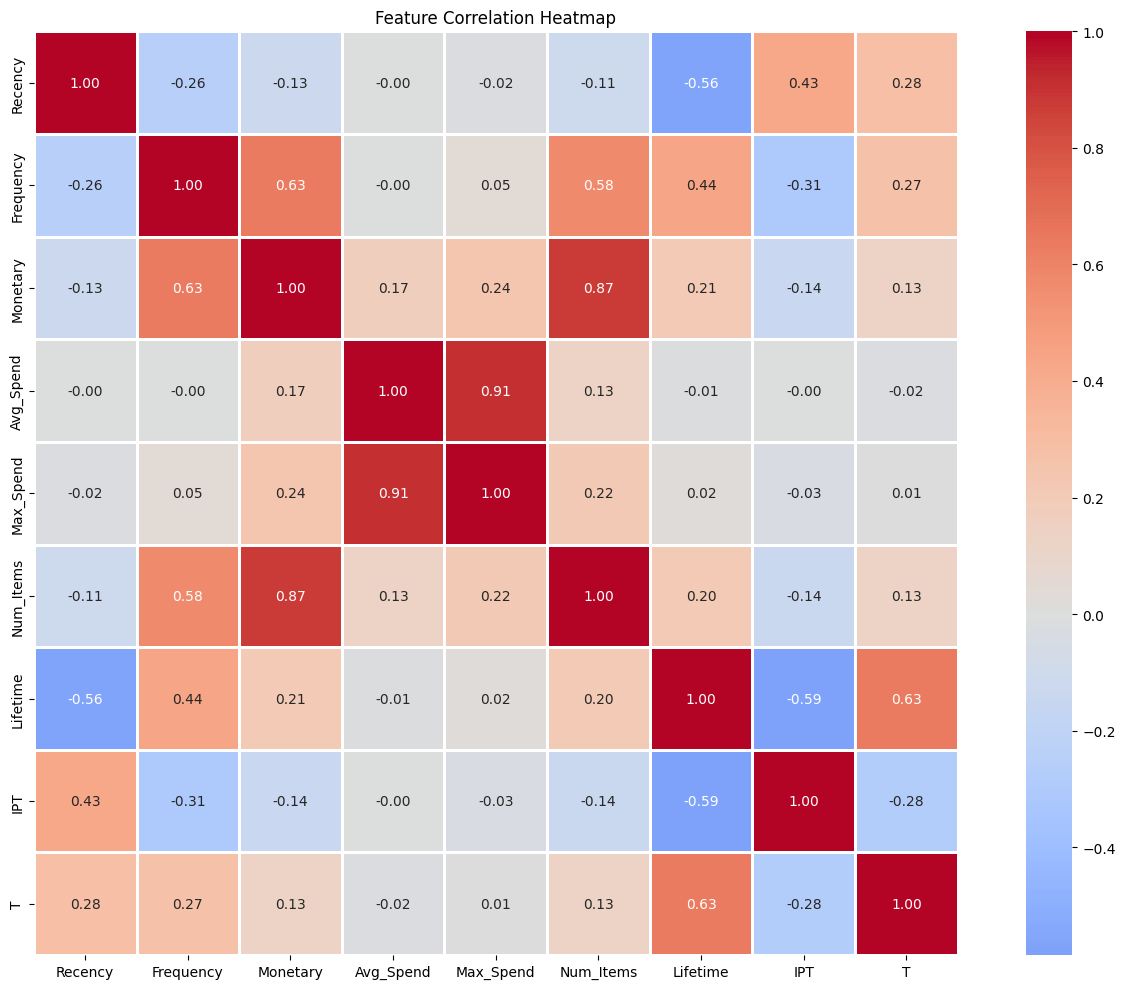

In [28]:
num_features = ["Recency", "Frequency", "Monetary", "Avg_Spend", "Max_Spend","Num_Items","Lifetime","IPT","T"]
plt.figure(figsize=(14,10))
correlation_matrix = rfm_adv[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [29]:
X = rfm_adv.drop(columns=["Max_Spend","Num_Items","First_Purchase","Last_Purchase"])
scaler_new = StandardScaler()
X_scaled = scaler_new.fit_transform(X)

In [30]:
silhouette = {}
for k in range(2,10):
  kmeans = KMeans(n_clusters=k,random_state=98)
  labels = kmeans.fit_predict(X_scaled)
  silhouette[k] = silhouette_score(X_scaled,labels)
silhouette

{2: np.float64(0.2871581462689046),
 3: np.float64(0.2704988296274474),
 4: np.float64(0.27883460846478136),
 5: np.float64(0.28205054626400017),
 6: np.float64(0.29199093947595794),
 7: np.float64(0.2932948519948036),
 8: np.float64(0.2810766394910275),
 9: np.float64(0.28324461263868245)}

In [31]:
kmeans = KMeans(n_clusters=7,random_state=98)
rfm_adv["Clusters"] = kmeans.fit_predict(X_scaled)

In [32]:
cluster_summary = (rfm_adv.groupby(rfm_adv["Clusters"]).
                   agg({
                       "Recency": "median",
                       "Frequency": "median",
                       "Monetary": "mean",
                       "Avg_Spend": "mean",
                       "Max_Spend": "mean",
                       "Num_Items": "median",
                       "Lifetime": "median",
                       "IPT": "mean",
                       "T": "median",
                       "CustomerID":"count"
                   }).rename(columns={"CustomerID":"NumCustomer"}))
cluster_summary

,Recency,Frequency,Monetary,Avg_Spend,Max_Spend,Num_Items,Lifetime,IPT,T,NumCustomer
Clusters,,,,,,,,,,
0,40.0,8.0,4626.864393,30.097229,213.532709,1564.0,589.0,112.011635,666.0,2049
1,230.0,1.0,368.140519,38.685045,70.925179,144.5,0.0,714.000000,230.0,1060
2,37.0,3.0,1532.630153,38.476273,142.526452,526.5,186.0,93.481095,281.0,1384
3,4.0,88.5,80574.714471,130.430203,1576.970000,33528.5,728.5,8.373658,736.0,34
4,1.5,153.5,436835.792500,204.164280,3324.832500,177166.0,736.0,4.144549,739.0,4
5,505.0,2.0,814.442045,49.459186,114.051322,232.0,29.5,354.398590,620.0,1346
6,1.0,2.0,168472.500000,56157.500000,168469.600000,80997.0,204.0,204.000000,206.0,1


In [33]:
clusters_labels ={
    0:"Active Mid-Value",
    1:"One-Time Lost",
    2:"Occasional",
    3:"Loyal High-Value",
    4:"VIP",
    5:"At Risk",
    6:"High Ticket"
}
rfm_adv["Segments"] = rfm_adv["Clusters"].map(clusters_labels)

### CHURN PROBABILITY MODELING

In [34]:
!pip install lifetimes

In [35]:
from lifetimes import BetaGeoFitter

In [36]:
bgf = BetaGeoFitter()
bgf.fit(rfm_adv["Frequency"]-1, rfm_adv["Lifetime"], rfm_adv["T"])

rfm_adv["prob_alive"] = bgf.conditional_probability_alive(
    rfm_adv["Frequency"]-1,
    rfm_adv["Lifetime"],
    rfm_adv["T"]
)


In [37]:
rfm_adv.head(10)

,CustomerID,Recency,Frequency,Monetary,First_Purchase,Last_Purchase,Avg_Spend,Max_Spend,Num_Items,Lifetime,IPT,T,Clusters,Segments,prob_alive
0,12346.0,326,12,77556.46,2009-12-14 08:34:00,2011-01-18 10:01:00,2281.072353,77183.60,74285,400,36.363636,726,0,Active Mid-Value,0.139553
1,12347.0,2,8,5633.32,2010-10-31 14:20:00,2011-12-07 15:52:00,22.266087,249.60,3286,402,57.428571,404,2,Occasional,0.983620
2,12348.0,75,5,2019.40,2010-09-27 14:59:00,2011-09-25 13:13:00,39.596078,240.00,2714,362,90.500000,438,2,Occasional,0.947398
3,12349.0,19,4,4428.69,2010-04-29 13:20:00,2011-11-21 09:51:00,25.306800,300.00,1624,570,190.000000,589,0,Active Mid-Value,0.966180
4,12350.0,310,1,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00,19.670588,40.00,197,0,714.000000,310,1,One-Time Lost,1.000000
5,12351.0,375,1,300.93,2010-11-29 15:23:00,2010-11-29 15:23:00,14.330000,23.40,261,0,714.000000,375,1,One-Time Lost,1.000000
6,12352.0,36,10,2849.84,2010-11-12 10:20:00,2011-11-03 14:37:00,27.668350,376.50,724,356,39.555556,393,2,Occasional,0.970839
7,12353.0,204,2,406.76,2010-10-27 12:44:00,2011-05-19 17:47:00,16.948333,39.80,212,204,204.000000,409,2,Occasional,0.865297
8,12354.0,232,1,1079.40,2011-04-21 13:11:00,2011-04-21 13:11:00,18.610345,54.08,530,0,714.000000,232,1,One-Time Lost,1.000000
9,12355.0,214,2,947.61,2010-05-21 11:59:00,2011-05-09 13:49:00,27.074571,120.00,543,353,353.000000,568,0,Active Mid-Value,0.893491


In [38]:
cluster_summary = (rfm_adv.groupby(rfm_adv["Segments"]).
                   agg({
                       "Recency": "median",
                       "Frequency": "median",
                       "T": "median",
                       "prob_alive": "mean",
                       "CustomerID":"count"
                   }).rename(columns={"CustomerID":"NumCustomer"}))
cluster_summary

,Recency,Frequency,T,prob_alive,NumCustomer
Segments,,,,,
Active Mid-Value,40.0,8.0,666.0,0.937652,2049
At Risk,505.0,2.0,620.0,0.704647,1346
High Ticket,1.0,2.0,206.0,0.942974,1
Loyal High-Value,4.0,88.5,736.0,0.929004,34
Occasional,37.0,3.0,281.0,0.883725,1384
One-Time Lost,230.0,1.0,230.0,1.000000,1060
VIP,1.5,153.5,739.0,0.997302,4


In [39]:
def segment_churn(prob):
    if prob < 0.3 or prob == 1:
        return "Churned"
    elif prob < 0.5:
        return "At Risk"
    else: return "Active"

rfm_adv["Churn_Segment"] = rfm_adv["prob_alive"].apply(segment_churn)

In [40]:
rfm_adv.head(5)

,CustomerID,Recency,Frequency,Monetary,First_Purchase,Last_Purchase,Avg_Spend,Max_Spend,Num_Items,Lifetime,IPT,T,Clusters,Segments,prob_alive,Churn_Segment
0,12346.0,326,12,77556.46,2009-12-14 08:34:00,2011-01-18 10:01:00,2281.072353,77183.6,74285,400,36.363636,726,0,Active Mid-Value,0.139553,Churned
1,12347.0,2,8,5633.32,2010-10-31 14:20:00,2011-12-07 15:52:00,22.266087,249.6,3286,402,57.428571,404,2,Occasional,0.983620,Active
2,12348.0,75,5,2019.40,2010-09-27 14:59:00,2011-09-25 13:13:00,39.596078,240.0,2714,362,90.500000,438,2,Occasional,0.947398,Active
3,12349.0,19,4,4428.69,2010-04-29 13:20:00,2011-11-21 09:51:00,25.306800,300.0,1624,570,190.000000,589,0,Active Mid-Value,0.966180,Active
4,12350.0,310,1,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00,19.670588,40.0,197,0,714.000000,310,1,One-Time Lost,1.000000,Churned


In [41]:
rfm_adv.tail(20)

,CustomerID,Recency,Frequency,Monetary,First_Purchase,Last_Purchase,Avg_Spend,Max_Spend,Num_Items,Lifetime,IPT,T,Clusters,Segments,prob_alive,Churn_Segment
5858,18268.0,134,6,1490.23,2009-12-11 10:27:00,2011-07-28 19:13:00,22.242239,59.50,711,594,118.800000,729,0,Active Mid-Value,0.941558,Active
5859,18269.0,366,1,337.20,2010-12-08 13:53:00,2010-12-08 13:53:00,24.085714,39.60,152,0,714.000000,366,1,One-Time Lost,1.000000,Churned
5860,18270.0,38,3,444.55,2010-10-03 10:49:00,2011-11-01 13:57:00,26.150000,53.20,209,394,197.000000,433,2,Occasional,0.951207,Active
5861,18271.0,610,2,680.85,2009-12-08 11:27:00,2010-04-09 09:26:00,32.421429,90.00,319,121,121.000000,732,5,At Risk,0.588131,Active
5862,18272.0,3,9,4385.98,2010-03-04 12:53:00,2011-12-07 12:43:00,19.406991,70.80,2880,642,80.250000,645,0,Active Mid-Value,0.985319,Active
5863,18273.0,2,4,357.00,2010-04-28 12:24:00,2011-12-07 13:16:00,89.250000,153.00,140,588,196.000000,591,0,Active Mid-Value,0.969070,Active
5864,18274.0,30,1,175.92,2011-11-09 17:03:00,2011-11-09 17:03:00,15.992727,19.80,88,0,714.000000,30,1,One-Time Lost,1.000000,Churned
5865,18275.0,578,2,741.85,2009-12-08 16:23:00,2010-05-10 15:46:00,39.044737,59.40,417,152,152.000000,731,5,At Risk,0.652299,Active
5866,18276.0,44,6,1656.52,2009-12-10 17:14:00,2011-10-27 10:54:00,17.622553,99.00,1246,685,137.000000,729,0,Active Mid-Value,0.971333,Active
5867,18277.0,58,5,1180.05,2010-08-02 10:26:00,2011-10-12 15:22:00,18.438281,79.95,449,436,109.000000,495,0,Active Mid-Value,0.958689,Active


In [43]:
df_with_clusters = df.merge(
    rfm_adv[["CustomerID", "Clusters","Segments","Churn_Segment"]],
    on="CustomerID",
    how="left"
)
df_with_clusters.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,Total Price,Clusters,Segments,Churn_Segment
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0,83.4,0,Active Mid-Value,Active
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,81.0,0,Active Mid-Value,Active
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,81.0,0,Active Mid-Value,Active
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0,100.8,0,Active Mid-Value,Active
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0,30.0,0,Active Mid-Value,Active


In [45]:
rfm_adv.to_csv("rfm_adv.csv", index=False)
df_with_clusters.to_csv("df_churn.csv",index=False)